# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None) # отобразим все столбцы
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Описание данных:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Взглянем на информацию нашего df:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограммы нашего df:

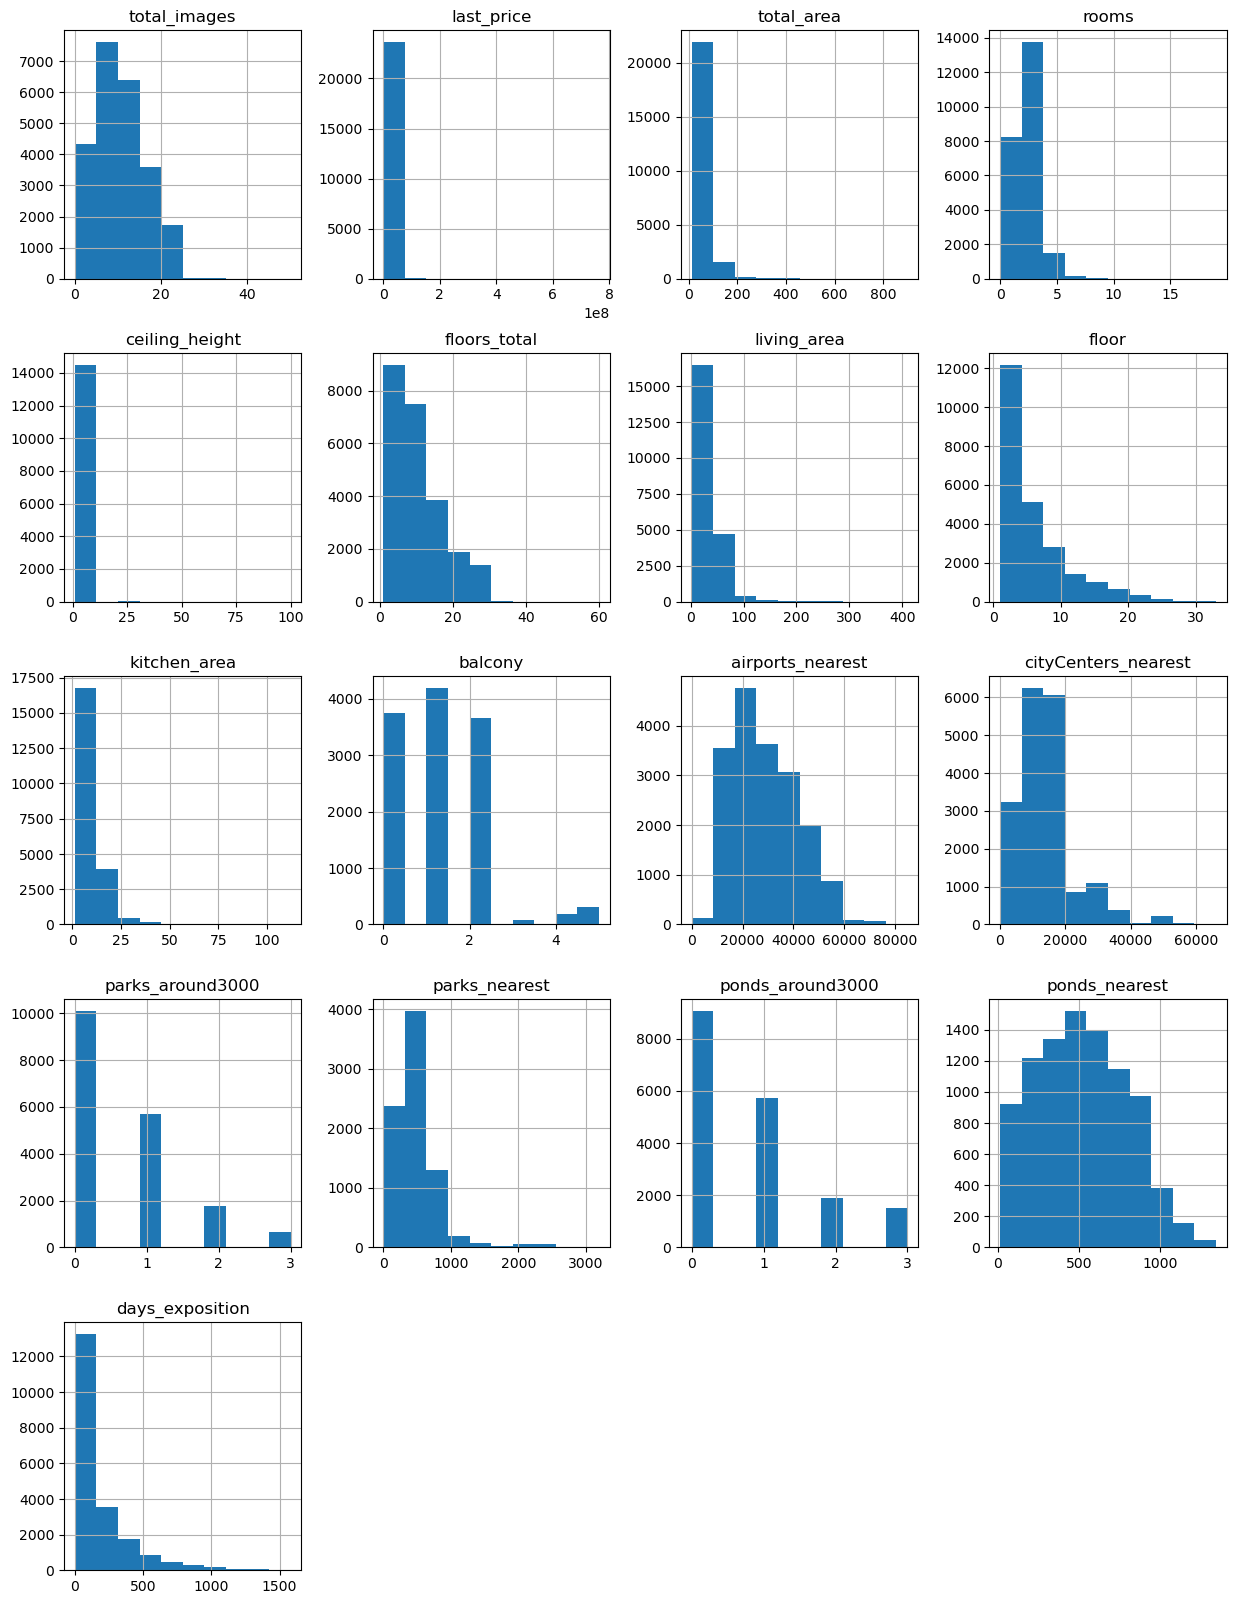

In [4]:
df.hist(figsize=(15, 20));

### Предобработка данных

#### Взглянем на наши пропуски в df:

In [5]:
df.isna().sum() # пропущенные значения

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Удалим строки где имеются пропуски данных в locality_name и floors_total:

In [6]:
df.dropna(subset=['locality_name', 'floors_total'], inplace=True)

Можем сделать вывод к пропускам в balcony, parks_around3000, ponds_around3000, что их просто не заполнили так как их просто нет, так что заполним пропуски нулями:

In [7]:
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Сменим тип данных для удобства:

In [9]:
df['last_price'] = df['last_price'].astype(int)
df['floors_total'] = df['floors_total'].astype(int)
df['balcony'] = df['balcony'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  int32  
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  int32  
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  int32  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

#### Подправим названия населенных пунктов(locality_name):

Посмотрим уникальные значения locality_name и их количество:

In [10]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [11]:
df['locality_name'].unique().shape[0] # количество уникальных значений

364

Сначала приведем всё к нижнему регистру. Потом заменим все "ё" на "е" и взглянем на количество уникальных значений:

In [12]:
df['locality_name'] = df['locality_name'].str.lower() # нижний регистр
df['locality_name'] = df['locality_name'].str.replace('ё', 'е') # замена
df['locality_name'].unique().shape[0] # количество уникальных значений

330

Теперь заменим "городской поселок" на "поселок городского типа" и взглянем на количество уникальных значений:

In [13]:
df['locality_name'] = df['locality_name'].str.replace('городской поселок','поселок городского типа') # замена
df['locality_name'].unique().shape[0] # количество уникальных значений

323

Взглянем на наличие явных дубликатов:

In [14]:
df.duplicated().sum()

0

Оценим наши данные:

In [15]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Избавимся от редких значений:

##### Рассмотрим last_price(цена на момент снятия с публикации):

In [16]:
df['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

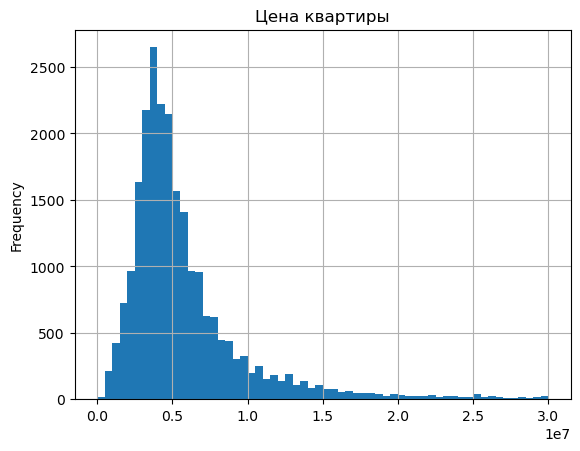

In [17]:
df['last_price'].plot(kind='hist', title='Цена квартиры', bins=60, range=(0, 3e+7), grid=True);

На графике 0 до 30 млн мы можем наблюдать, что есть значения приблеженные к 0, а для квартир это слишком дешево. Плюс в describe мы видим минимальное и максимальное. Так что посмотрим на количество квартир меньше 1 млн и больше 90 млн:

Квартиры со стоимостью меньше 1 млн:

In [18]:
df.query('last_price < 1e+6')['last_price'].count()

225

225 квартир стоят меньше 1 млн, судя по всему данная информация не является аномалией, так что оставим.
Рассмотрим количество квартир, которые стоят меньше 50 000, потому что на графике прям очень рядом с 0 есть небольшой скачок и в describe мы точно знаем, что есть очень дешевая квартира (что не норма):

In [19]:
df.query('last_price < 5e+4')['last_price'].count()

1

Вот и она принципе та самая дешевая квартира, избавимся от неё удалив ее из df:

In [20]:
df.drop(index=df.query('last_price < 5e+4').index, inplace=True)

Для удобства в дальнейшем избавимся от слишком дорогих квартир:

In [21]:
df.query('last_price > 9e+7')['last_price'].count()

45

Их как раз не особо много, так что удаляем для удобства из df:

In [22]:
df.drop(index=df.query('last_price > 9e+7').index, inplace=True)

##### Рассмотрим total_area(общая площадь квартиры в квадратных метрах (м²)):


In [23]:
df['total_area'].describe()

count    23519.000000
mean        59.806163
std         33.003552
min         12.000000
25%         40.000000
50%         52.000000
75%         69.400000
max        590.000000
Name: total_area, dtype: float64

из describe мы знаем что у нас есть минимальная площадь 12 и максимальная 900 квадратных метров. Насчет минимальной квартиры принципе притензий нету (так что оставим ее). А вот максимальная это черезчур и я не думаю, что их так много. Так что возьмем 900 поделим на 3 и получим 300 квадратных. 
И взглянем на график от 12 до 300:

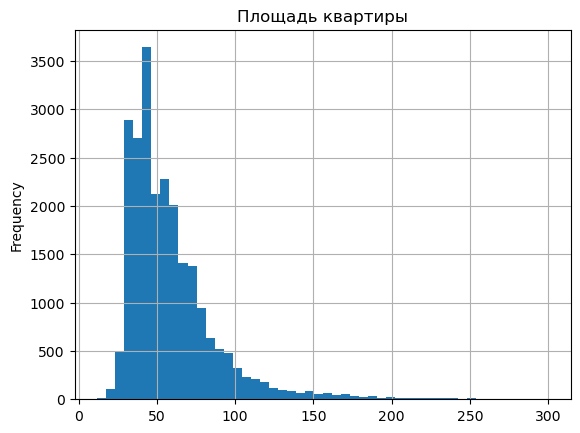

In [24]:
df['total_area'].plot(kind='hist', title='Площадь квартиры', bins=50, range=(12, 300), grid=True);

Принципе по графику уже ясно, что квартир больш 300 квадратных метров будет немного. Так что убедимся при помощи count и избавимся от них для удобства:

In [25]:
df.query('total_area > 300')['total_area'].count()

41

Принципе мы этого и ожидали благодаря графику, удалим их:

In [26]:
df.drop(index=df.query('total_area > 300').index, inplace=True)

##### Рассмотрим rooms(число комнат):

In [27]:
df['rooms'].describe()

count    23478.000000
mean         2.056691
std          1.042676
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

За счет describe мы знаем, что максимальное количество комнат в квартире это 19. Давайте для начала посмотрим на график в целом:

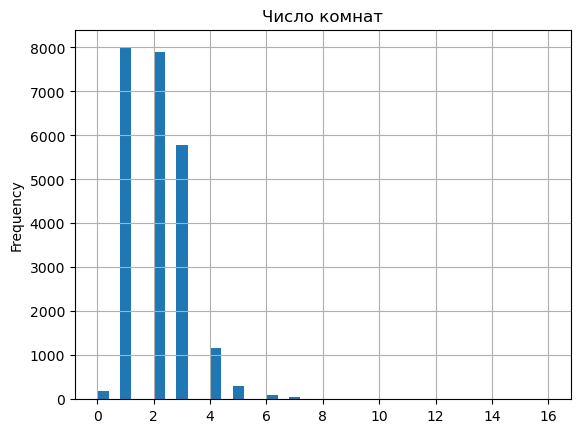

In [28]:
df['rooms'].plot(kind='hist', title='Число комнат', bins=40, grid=True);

По графику мы принципе видим что квартиры из нашего df в основном имеют количество комнат от 0 до 7. Так давайте удалим для удобства где их больше.

In [29]:
df.query('rooms > 7')['rooms'].count()

18

In [30]:
df.drop(index=df.query('rooms > 7').index, inplace=True)

##### Рассмотрим ceiling_height — высота потолков (м):

In [31]:
df['ceiling_height'].describe()

count    14409.000000
mean         2.767719
std          1.263293
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В своде правил установлено, что в многоквартирных домах в центральной части России потолок должен быть не ниже 2,5 м, а в Сибири, на Дальнем Востоке и на севере Центральной России — не ниже 2,7 м.

Максимальная высота потолков, как правило, не регламентируется, но чаще всего она в современной застройке не превышает 3,2 метра. В старых домах с увеличенными габаритами и площадью потолки могут быть 4 метра высотой и более.

Так же можем заметить что у нас отпечатка в данных, где потолки стремятся к небесам, исправим ее поделив на 10.

По скольку в наших человеческих реалиях возможен потолок от 2,5 м до 4х метров, будем оталкиваться от этого. Но чтобы было проще работать с опечаткой будем учитывать от 2,5 до 3,2 метров (с опечаткой будем выглядеть от 25 до 32 метров). Для удобства оставил комментарии:

In [32]:
df.drop(index=df.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True) # удаляем от 4 до 25
df.drop(index=df.query('ceiling_height > 32').index,inplace=True) # удаляем больше 32
df.update(df[(df['ceiling_height'] >= 25) & (df['ceiling_height'] <= 32)]['ceiling_height']/10) # от 25 до 32 мы приводим значения к человеческим
df.drop(index=df.query('ceiling_height < 2.5').index,inplace=True) # удаляем значения ниже нормы


Посмотрим, на итоговый график:

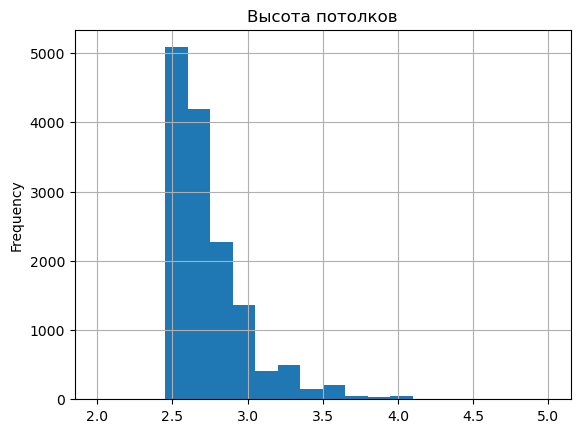

In [33]:
df['ceiling_height'].plot(kind='hist', title='Высота потолков', bins=20, range=(2, 5), grid=True);

Все хорошо

##### Рассмотрим floors_total(всего этажей в доме):

In [34]:
df['floors_total'].describe()

count    23339.000000
mean        10.712970
std          6.600892
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Из describe мы знаем что количество в доме у нас может быть от 1 до 60. Давайте взглянем на график:

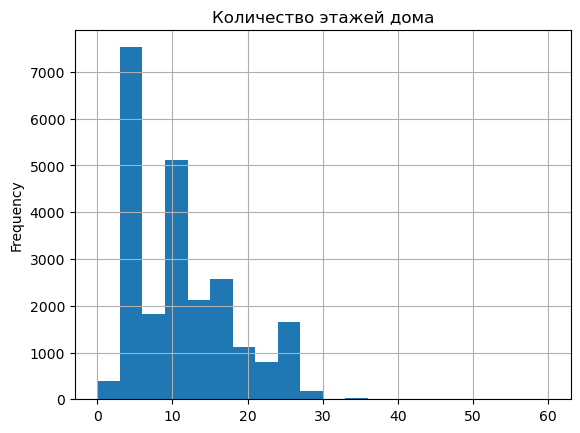

In [35]:
df['floors_total'].plot(kind='hist', title='Количество этажей дома', bins=20, range=(0, 60), grid=True);

По графику мы принципе сразу понимаем, что домов с количеством этажей больше 30 очень мало. Так что убедимся в их малом количестве и удалим их из нашего df:

In [36]:
df.query('floors_total > 30')['floors_total'].count()

31

Как и ожидалось, удаляем:

In [37]:
df.drop(index=df.query('floors_total > 30').index,inplace=True)

##### Рассмотрим living_area (жилая площадь в квадратных метрах (м²)):

In [38]:
df['living_area'].describe()

count    21471.000000
mean        33.797797
std         19.164688
min          2.000000
25%         18.600000
50%         30.000000
75%         42.100000
max        250.000000
Name: living_area, dtype: float64

Из describe мы знаем что минимальное у нас 2 квадратных метра (что явно является не нормой), а максимальное 400+. Давай взглянем на график:

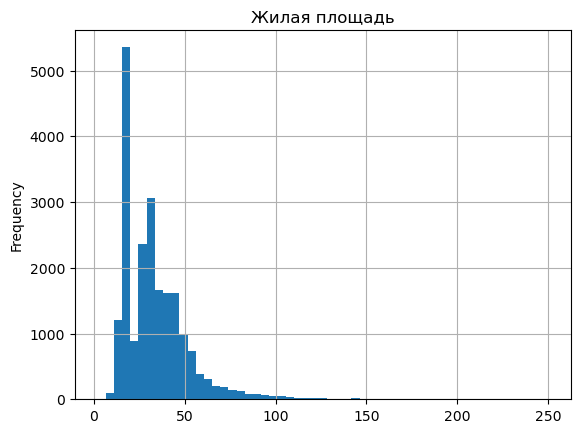

In [39]:
df['living_area'].plot(kind='hist', title='Жилая площадь', bins=55, grid=True);

По графику мы принципе сразу можем понять, что квартиры с жилой площадью больше 150ти мы учитывать не будем. Так как их слишком мало. Но надо так же избавиться от квартир где жилая площадь мала:

In [40]:
df.query('living_area > 150')['living_area'].count() # количество больше 150 метров квадратных

54

Как и ожидалось, удалим их:

In [41]:
df.drop(index=df.query('living_area > 150').index,inplace=True)

Посмотрим на квартиры с малой площадью и избавимся от них:

In [42]:
df.query('living_area < 10')['living_area'].count() # количество меньше 10 метров квадратных

25

In [43]:
df.drop(index=df.query('living_area < 10').index,inplace=True) # удаляем

##### Рассмотрим floor(этаж):

In [44]:
df['floor'].describe()

count    23229.000000
mean         5.873262
std          4.850543
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

Так как мы уже работали с этажами домомов и из describe знаем, что нету квартир расположенных на 0ом этаже. Просто взглянем на график:

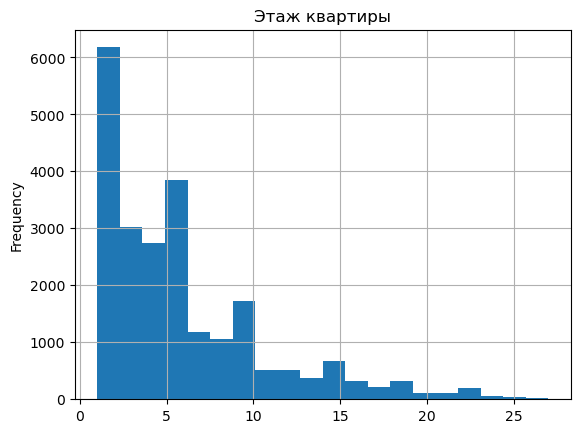

In [45]:
df['floor'].plot(kind='hist', title='Этаж квартиры', bins=20, grid=True);

По графику видно, что все нормально

##### Рассмотрим kitchen_area(площадь кухни в квадратных метрах (м²)):

In [46]:
df['kitchen_area'].describe()

count    21049.000000
mean        10.413359
std          5.479108
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Из describe мы знаем что есть квартира с минимальной кухней +-1 квадратного метра (это слишком мало) и максимальной 112 метров квадратных (не думаю что таких значений много). Поэтому взглянем на график:

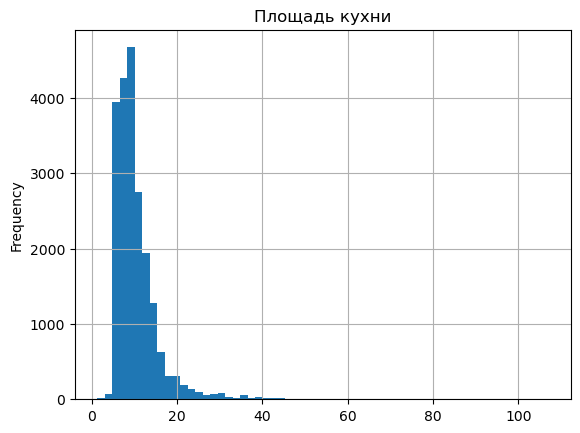

In [47]:
df['kitchen_area'].plot(kind='hist', title='Площадь кухни', bins=60, grid=True);

На графике мы сразу видим, что кухон с площадью больше 50ти квадратных метров мало. Так что избавимся от них и так же от слишком маленьких:

In [48]:
df.query('kitchen_area > 50')['living_area'].count() # количество кухон где площадь больше 50ти

30

In [49]:
df.query('kitchen_area < 2')['living_area'].count() # количество мелких кухон

1

Удалим их:

In [50]:
df.drop(index=df.query('kitchen_area < 2').index,inplace=True)
df.drop(index=df.query('kitchen_area > 50').index,inplace=True)

##### Рассмотрим balcony(число балконов):

In [51]:
df['balcony'].describe()

count    23197.000000
mean         0.594215
std          0.959953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

По describe мы видим, что все вроде нормально. Убедимся при помощи графика:

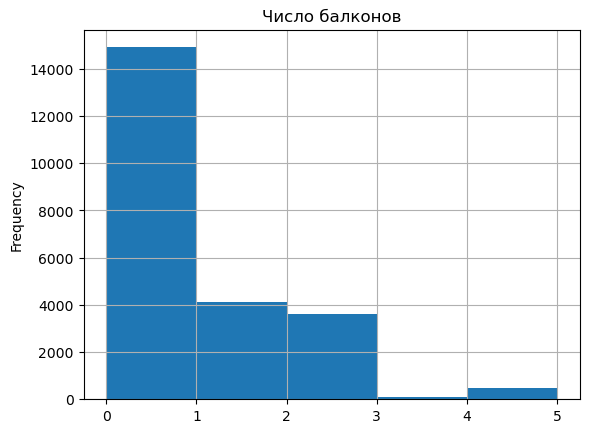

In [52]:
df['balcony'].plot(kind='hist', title='Число балконов', bins=5, grid=True);

Все хорошо

##### Рассмотрим days_exposition(сколько дней было размещено объявление (от публикации до снятия)):

In [53]:
df['days_exposition'].describe()

count    20099.000000
mean       179.864769
std        219.038018
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

По describe мы поняли, что минимального значения 0 нету и это хорошо, поэтому построим график, чтобы избавиться от редких:

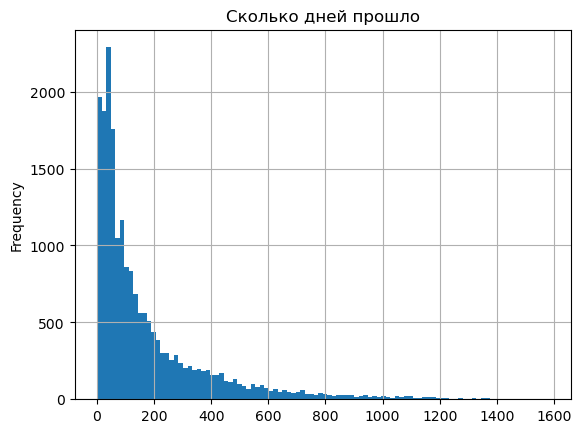

In [54]:
df['days_exposition'].plot(kind='hist', title='Сколько дней прошло', bins=100, grid=True);

Видим что публикаций мало после 1400 дней, взглянем на них и удалим:

In [55]:
df.query('days_exposition > 1400')['days_exposition'].count() # Считаем

19

In [56]:
df.drop(index=df.query('days_exposition > 1400').index,inplace=True) # Удаляем

##### Рассмотрим airports_nearest(расстояние до ближайшего аэропорта в метрах (м)):

In [57]:
df['airports_nearest'].describe()

count    17699.000000
mean     28850.752585
std      12686.267626
min          0.000000
25%      18490.000000
50%      26890.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

По describe мы сразу видим минимальное значение 0. А это означает что квартира находится прямо в аэропорту. Так что построим график, чтобы это отследить и избавиться от данной проблемы:

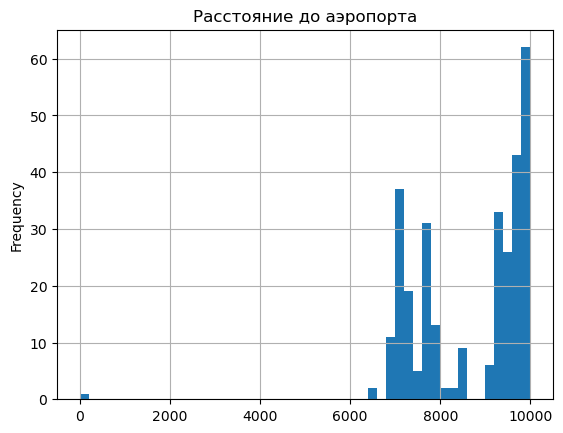

In [58]:
df['airports_nearest'].plot(kind='hist', title='Расстояние до аэропорта', bins=50, range=(0, 1e+4), grid=True);

In [59]:
df.query('airports_nearest < 2000')['airports_nearest'].count()

1

Она как раз единственная такая, так что удалим:

In [60]:
df.drop(index=df.query('airports_nearest < 2000').index,inplace=True)

#### Оценим данные еще разок:

In [61]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23177.000000,2.317700e+04,23177.000000,23177.000000,14182.000000,23177.000000,21342.000000,23177.000000,20998.000000,23177.000000,17698.000000,17718.000000,23177.000000,7815.000000,23177.000000,8802.000000,20079.000000
mean,9.858869,6.014365e+06,58.502535,2.040471,2.717116,10.692238,33.429905,5.875696,10.331453,0.594167,28852.382755,14275.879219,0.460715,491.259117,0.579324,521.763349,178.640221
std,5.668426,5.485516e+06,27.850051,1.002629,0.250090,6.538117,17.835163,4.853412,5.051761,0.959949,12684.772115,8593.344514,0.739921,342.407571,0.873675,277.288613,215.454313
min,0.000000,4.300000e+05,12.000000,0.000000,2.500000,1.000000,10.000000,1.000000,2.000000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18490.000000,9425.250000,0.000000,288.000000,0.000000,299.000000,45.000000
50%,9.000000,4.600000e+06,51.900000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26890.000000,13149.000000,0.000000,455.000000,0.000000,506.000000,95.000000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.800000,16.000000,42.000000,8.000000,11.900000,1.000000,37407.000000,16293.000000,1.000000,613.000000,1.000000,733.000000,229.000000
max,50.000000,9.000000e+07,300.000000,7.000000,4.000000,29.000000,150.000000,27.000000,50.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1396.000000


Теперь наш df стал лучше

#### Заполним пропуски там где сможем:

Взглянем на количество пропусков нашего df:

In [62]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8995
floors_total                0
living_area              1835
floor                       0
is_apartment            20462
studio                      0
open_plan                   0
kitchen_area             2179
balcony                     0
locality_name               0
airports_nearest         5479
cityCenters_nearest      5459
parks_around3000            0
parks_nearest           15362
ponds_around3000            0
ponds_nearest           14375
days_exposition          3098
dtype: int64

##### Квартиры с одинаковым количеством комнат скорее всего буду иметь похожую жилую и кухонную площадь. Следовательно заполним пропуски жилой площади living_area медианными значениями, сгруппировав по количеству комнат:

In [63]:
df['living_area'].isna().sum() # количество пропусков в living_area

1835

In [64]:
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('median'))
df['living_area'].isna().sum() # количество пропусков в living_area

0

У нас получилось заполнить все пропуски в living_area. Но надо убедиться в том, чтобы у нас не было ошибочных данных - где общая плошадь(total_area) меньше жилой(living_area):

In [65]:
df.query('total_area < living_area')['living_area'].count()

29

Увы такие казусы у нас имеются, так что найдем средний коэфициент жилой площади(living_area) к общей(total_area) и умножим ее на жилую площадь(living_area) в ошибочных моментах:

In [66]:
df.loc[df['total_area'] < df['living_area'], 'living_area'] = df['total_area'] * (df['living_area'] / df['total_area']).mean()

Совершим повторную проверку:

In [67]:
df.query('total_area < living_area')['living_area'].count()

0

Все хорошо

##### С кухонной площадью(kitchen_area) поступим так же как и с жилой(living_area):

In [68]:
df['kitchen_area'].isna().sum() # количество пропусков kitchen_area

2179

In [69]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('rooms')['kitchen_area'].transform('median'))
df['kitchen_area'].isna().sum() # количество пропусков kitchen_area

188

Мы избавились от большего количество пропусков. Совершим аналогичную проверку на проблемные данные:

In [70]:
df.query('total_area < kitchen_area')['kitchen_area'].count()

0

На этот раз нам повезло. Все хорошо

##### Логично предпложить, что высота потолков в похожих дома одинаковы. Следовательно заполним пропуски высоты потолка(ceiling_height) медианными значениями, сгруппировав по названию населённого пункта(locality_name) и количество этажей в доме(floors_total):

In [71]:
df['ceiling_height'].isna().sum() # количество пропусков в ceiling_height

8995

In [72]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby(['locality_name','floors_total'])['ceiling_height'].transform('median'))
df['ceiling_height'].isna().sum() # количество пропусков в ceiling_height

350

Мы избавились от колосального количества пропусков

##### Можем предположить, что если апартаменты(is_apartment) не заполнили данными, то скорее всего данная квартира не является апартаментом, следовательно пропуски можно заполнить булевым значением False:

In [73]:
df['is_apartment'].isna().sum() # количество пропусков в is_apartment

20462

Заполним пропуски и поменяем тип:

In [74]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isna().sum() # количество пропусков в is_apartment

0

Мы избавились от всех пропусков в is_apartment.

##### Не будем заполнять пропуски в days_exposition(сколько дней было размещено объявление от публикации до снятия), так как данные пропуски могут означать то, что данная квартира еще не продана.

In [75]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            350
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              188
balcony                     0
locality_name               0
airports_nearest         5479
cityCenters_nearest      5459
parks_around3000            0
parks_nearest           15362
ponds_around3000            0
ponds_nearest           14375
days_exposition          3098
dtype: int64

Посмотрим что у нас в итоге получилось:

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23177 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23177 non-null  int64  
 1   last_price            23177 non-null  int32  
 2   total_area            23177 non-null  float64
 3   first_day_exposition  23177 non-null  object 
 4   rooms                 23177 non-null  int64  
 5   ceiling_height        22827 non-null  float64
 6   floors_total          23177 non-null  int32  
 7   living_area           23177 non-null  float64
 8   floor                 23177 non-null  int64  
 9   is_apartment          23177 non-null  bool   
 10  studio                23177 non-null  bool   
 11  open_plan             23177 non-null  bool   
 12  kitchen_area          22989 non-null  float64
 13  balcony               23177 non-null  int32  
 14  locality_name         23177 non-null  object 
 15  airports_nearest   

Наш df стал выглядить куда лучше

### Посчитаем и добавим в таблицу новые столбцы

#### Добавим в таблицу: цену одного квадратного метра

In [77]:
df['price_1m'] = (df['last_price'] / df['total_area']).round().astype(int) # для удобства округлим и поменяем тип

#### Добавим в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [78]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # приведем к нужному типу

In [79]:
df['day_week'] = df['first_day_exposition'].dt.weekday

#### Добавим в таблицу: месяц публикации объявления

In [80]:
df['month'] = df['first_day_exposition'].dt.month

#### Добавим в таблицу: год публикации объявления

In [81]:
df['year'] = df['first_day_exposition'].dt.year

#### Добавим в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)

In [82]:
def floor_type_find(row):
    '''
    В данной функции мы осуществляем проверку типа этажа
    '''
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'


df['floor_type'] = df.apply(floor_type_find, axis=1)

#### Добавим в таблицу: расстояние в км до центра города

In [83]:
df['distance_city_center'] = round(df['cityCenters_nearest'] / 1000).astype('Int32') # для удобства округлим и поменяем тип

#### Посмотрим что в итоге у нас получилось:

In [84]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m,day_week,month,year,floor_type,distance_city_center
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921,1,12,2018,первый,19
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786,3,8,2015,другой,14
3,0,64900000,159.00,2015-07-24,3,2.60,14,45.00,9,False,False,False,9.50,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,7
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,8
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,поселок городского типа янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95066,0,9,2018,другой,<NA>
6,6,3700000,37.30,2017-11-02,1,2.60,26,10.60,6,False,False,False,14.40,1,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99196,3,11,2017,другой,19
7,5,7915000,71.60,2019-04-18,2,2.75,24,30.50,22,False,False,False,18.90,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110545,3,4,2019,другой,12
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,поселок мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0,87455,2,5,2018,другой,<NA>
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88525,6,2,2017,другой,15


### Проведем исследовательский анализ данных

#### Изучим и опишем следующие параметры:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления

##### Общая площадь:

In [85]:
df['total_area'].describe()

count    23177.000000
mean        58.502535
std         27.850051
min         12.000000
25%         40.000000
50%         51.900000
75%         69.000000
max        300.000000
Name: total_area, dtype: float64

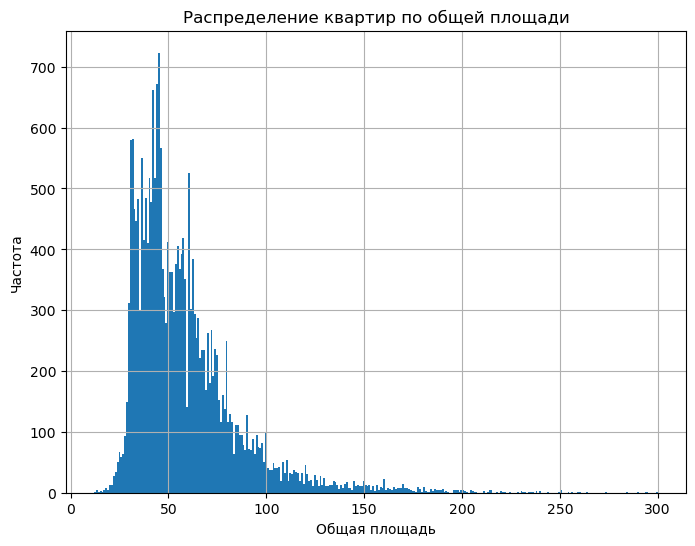

In [86]:
plt.figure(figsize=(8, 6))
df['total_area'].plot(kind='hist', bins=300, grid=True)
plt.title('Распределение квартир по общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Частота')
plt.show()

Когда мы занимались предобработкой данных, мы избавились от редких значений. Так что выглядит все нормально.

Мы наблюдаем большую часть квартир, которая имеет общую площадь от 25 до 70 квадратных метров. Дальше идет спад - это нам говорит о том, что есть небольшая часть квартир с большими общими площадями до 300 квадратных метров.

##### Жилая площадь:

In [87]:
df['living_area'].describe()

count    23177.000000
mean        33.292031
std         17.622980
min          7.334898
25%         18.300000
50%         30.100000
75%         42.100000
max        150.000000
Name: living_area, dtype: float64

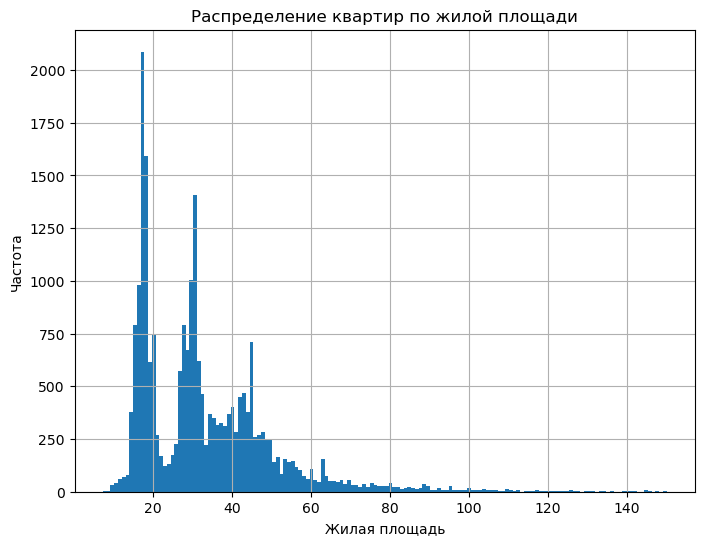

In [88]:
plt.figure(figsize=(8, 6))
df['living_area'].plot(kind='hist', bins=150, grid=True)
plt.title('Распределение квартир по жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Частота')
plt.show()

Когда мы занимались предобработкой данных, мы избавились от редких значений, а так же заполнили пропуски медианными значениями. Все выглядит хорошо.

Мы наблюдаем большую часть квартир с жилой площадью от 18 до 42 квадратных метров. Дальше идет спад - это нам говорит о том, что есть небольшая часть квартир с большими жилыми площадями до 150 квадратных метров.

##### Площадь кухни:

In [89]:
df['kitchen_area'].describe()

count    22989.000000
mean        10.237090
std          4.847713
min          2.000000
25%          7.200000
50%          9.000000
75%         11.400000
max         50.000000
Name: kitchen_area, dtype: float64

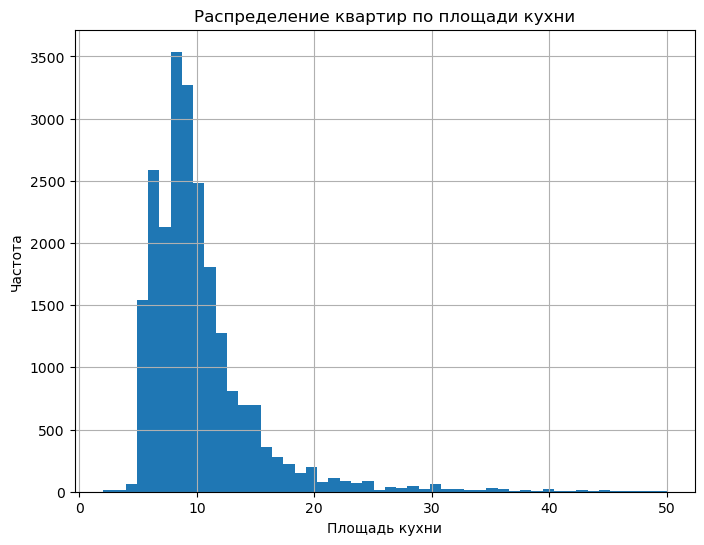

In [90]:
plt.figure(figsize=(8, 6))
df['kitchen_area'].plot(kind='hist', bins=50, grid=True)
plt.title('Распределение квартир по площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Частота')
plt.show()

Когда мы занимались предобработкой данных, мы избавились от редких значений, а так же заполнили пропуски медианными значениями. Все выглядит хорошо.

Мы наблюдаем большую часть квартир с площадью кухни от 7 до 11 квадратных метров. Дальше идет спад - это нам говорит о том, что есть небольшая часть квартир с большими площадями кухни до 50 квадратных метров.

##### Цена объекта:

In [91]:
df['last_price'].describe()

count    2.317700e+04
mean     6.014365e+06
std      5.485516e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      9.000000e+07
Name: last_price, dtype: float64

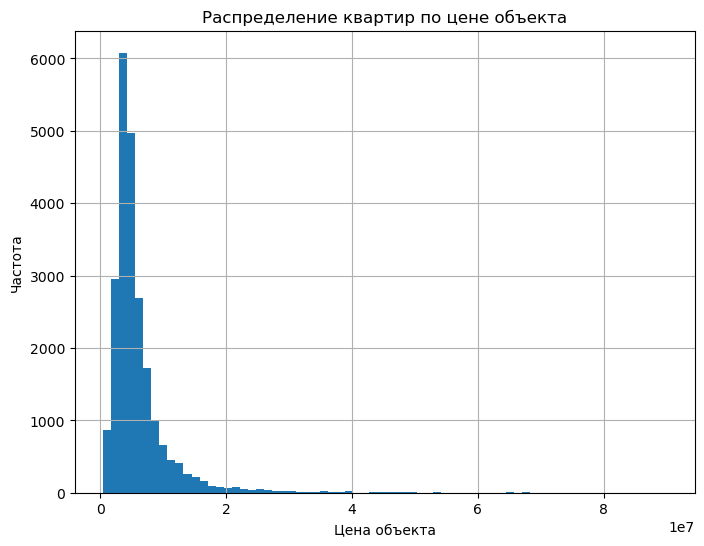

In [92]:
plt.figure(figsize=(8, 6))
df['last_price'].plot(kind='hist', bins=70, range=(4e+5, 9e+7), grid=True)
plt.title('Распределение квартир по цене объекта')
plt.xlabel('Цена объекта')
plt.ylabel('Частота')
plt.show()

Когда мы занимались предобработкой данных мы удалили редкие значения. Все выглядит нормально.

Мы можем наблюдать большую часть квартир с ценой объекта от 3.4 млн до 6.7 млн. Дальше идет спад - это нам говорит о том, что есть небольшая часть квартир со стоимостью доходящей до 90 млн.

##### Количество комнат:

In [93]:
df['rooms'].describe()

count    23177.000000
mean         2.040471
std          1.002629
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

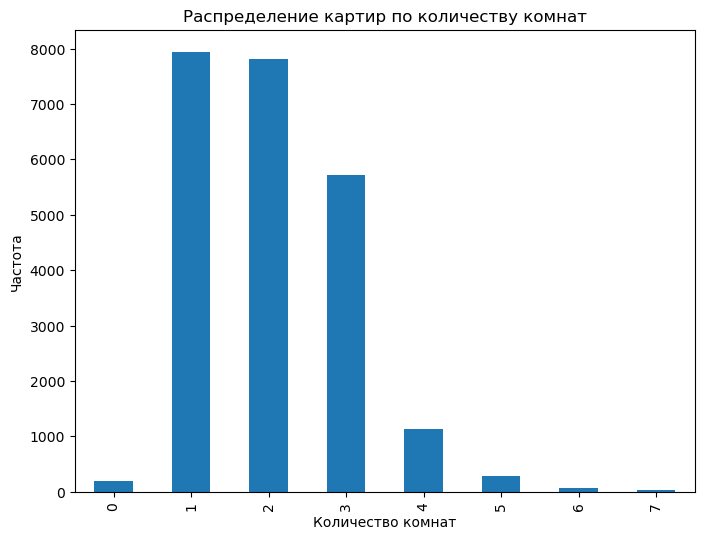

In [94]:
plt.figure(figsize=(8, 6)) 
df.groupby('rooms')['locality_name'].count().plot(kind='bar')
plt.title('Распределение картир по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()

Когда мы занимались предобработкой данных мы удалили редкие значения. по describe и bar все выглядит нормально.

Мы можем наблюдать большую часть квартир с количеством комнат от 1 до 3. В остальных случаях наблюдаем спад - это нам говорит о том, что есть небольшая часть квартир с количеством комнат (0, 4, 5, 6, 7).

##### Высота потолков:

In [95]:
df['ceiling_height'].describe()

count    22827.000000
mean         2.701608
std          0.217185
min          2.500000
25%          2.550000
50%          2.650000
75%          2.750000
max          4.000000
Name: ceiling_height, dtype: float64

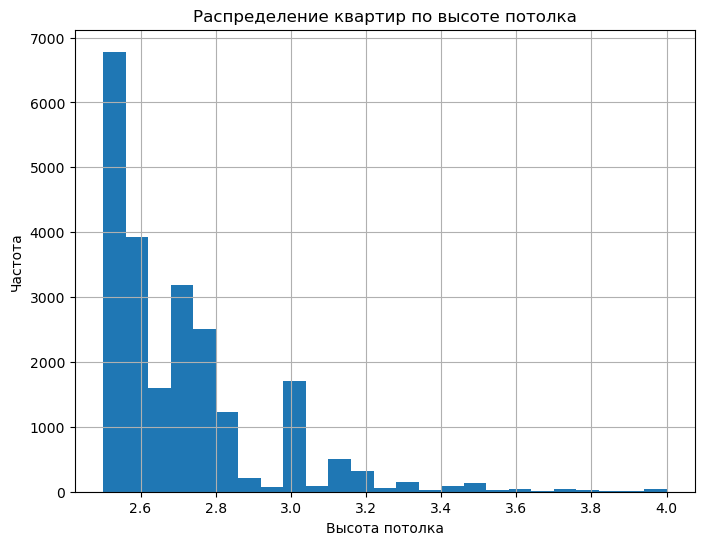

In [96]:
plt.figure(figsize=(8, 6))
df['ceiling_height'].plot(kind='hist', bins=25, grid=True)
plt.title('Распределение квартир по высоте потолка')
plt.xlabel('Высота потолка')
plt.ylabel('Частота')
plt.show()

Когда мы занимались предобработкой данных мы удалили редкие значения. И запонлили пропуски медианными значениями. Так что все выглядит нормально.

Мы можем наблюдать большую часть квартир с высотой потолка от 2.5 до 2.8 метров. Дальше идет спад - это нам говорит о том, что есть небольшая часть квартир с высотой потолка доходящая до 4 метров.

##### Этаж квартиры:

In [97]:
df['floor'].describe()

count    23177.000000
mean         5.875696
std          4.853412
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

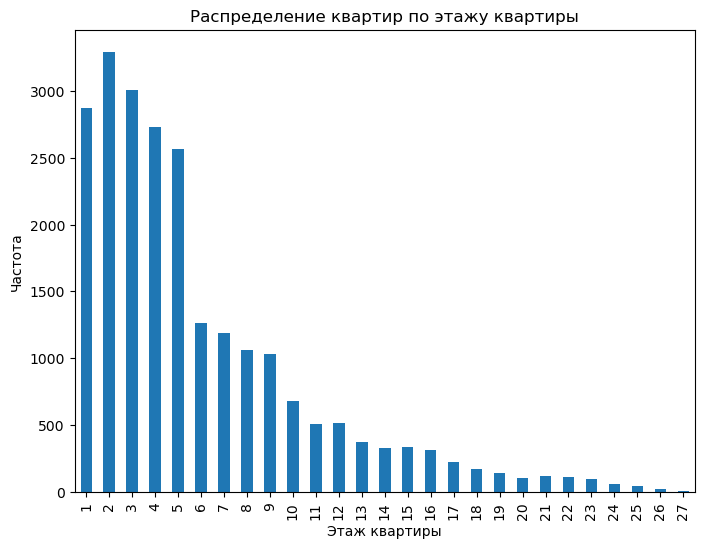

In [98]:
plt.figure(figsize=(8, 6))
df.groupby('floor')['locality_name'].count().plot(kind='bar')
plt.title('Распределение квартир по этажу квартиры')
plt.xlabel('Этаж квартиры')
plt.ylabel('Частота')
plt.show()

Так же как и в предобработке данных все нормально.

Мы можем наблюдать большую часть квартир расположенных на этажах с 1-ого по 5-ый. Дальше идет спад - это нам говорит о том, что есть небольшая часть квартир расположенных на этажах доходящих до 27-ого.

##### Тип этажа квартиры («первый», «последний», «другой»):

In [99]:
df['floor_type'].describe()

count      23177
unique         3
top       другой
freq       17074
Name: floor_type, dtype: object

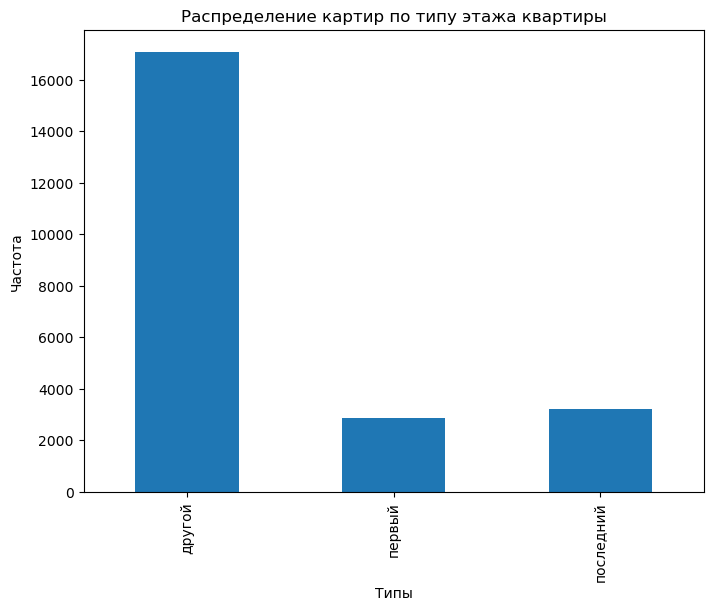

In [100]:
plt.figure(figsize=(8, 6))
df.groupby('floor_type')['floor_type'].count().plot(kind='bar')
plt.title('Распределение картир по типу этажа квартиры')
plt.xlabel('Типы')
plt.ylabel('Частота')
plt.show()

Все выглядит нормально.

Мы можем наблюдать большую часть квартир с типом этажа - "другой". Небольшая часть квартир имеет типы - "первый" и "последний".

##### Общее количество этажей в доме:

In [101]:
df['floors_total'].describe()

count    23177.000000
mean        10.692238
std          6.538117
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

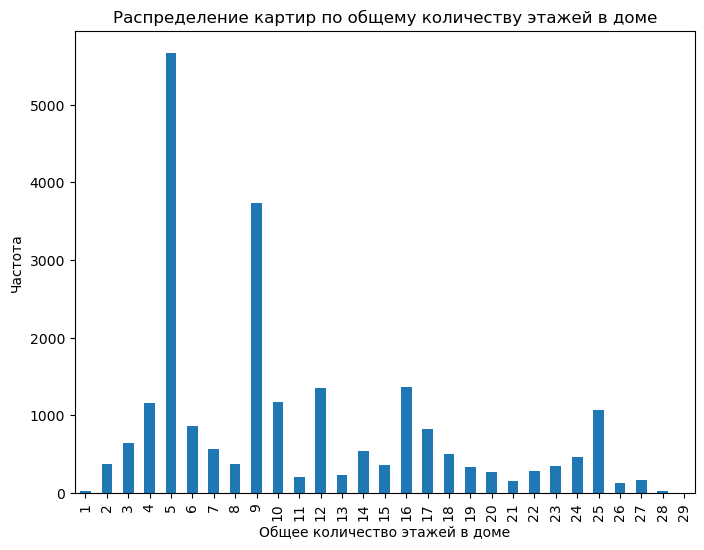

In [102]:
plt.figure(figsize=(8, 6))
df.groupby('floors_total')['locality_name'].count().plot(kind='bar')
plt.title('Распределение картир по общему количеству этажей в доме')
plt.xlabel('Общее количество этажей в доме')
plt.ylabel('Частота')
plt.show()

Когда мы занимались предобработкой данных мы удалили редкие значения. Все выглядит нормально.

Мы можем наблюдать большучасть квартир в домах у которых общее количество этажей составляет 5 и 9 этажей. В остальных случаях у нас небольшая часть квартир.

##### Расстояние до центра города в метрах:

In [103]:
df['cityCenters_nearest'].describe()

count    17718.000000
mean     14275.879219
std       8593.344514
min        181.000000
25%       9425.250000
50%      13149.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

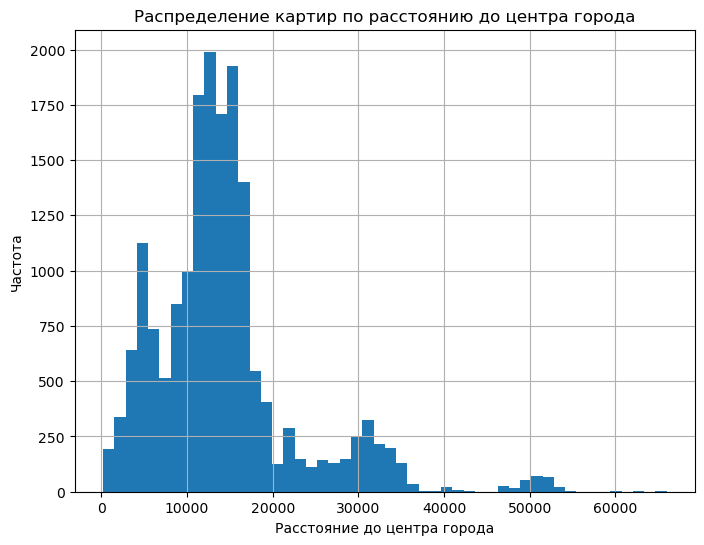

In [104]:
plt.figure(figsize=(8, 6))
df['cityCenters_nearest'].plot(kind='hist', bins=50, grid=True)
plt.title('Распределение картир по расстоянию до центра города')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Частота')
plt.show()

Мы можем наблюдать большую часть квартир расположенных от центра города на расстоянии от 9 до 16 километров. Дальше идет спад - это говорит о том, что небольшая часть квартир расположена еще дальше или ближе от центра города (расстояние от центра города доходит от 181-ого метра до 65-ти километров).

##### Расстояние до ближайшего аэропорта:

In [105]:
df['airports_nearest'].describe()

count    17698.000000
mean     28852.382755
std      12684.772115
min       6450.000000
25%      18490.000000
50%      26890.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

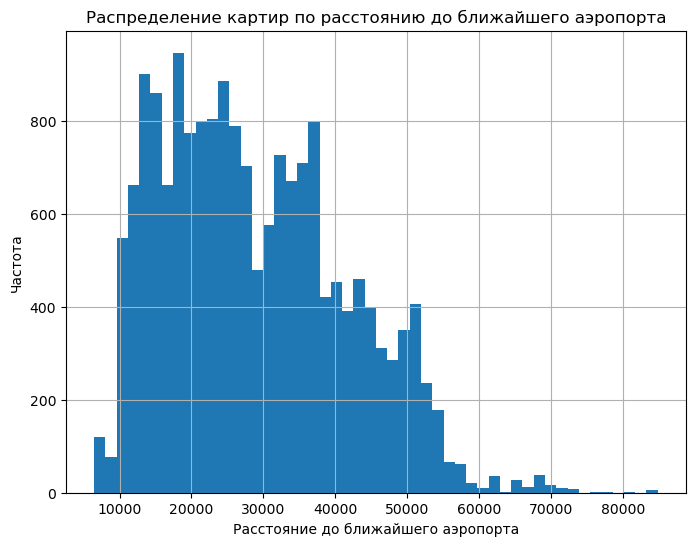

In [106]:
plt.figure(figsize=(8, 6))
df['airports_nearest'].plot(kind='hist', bins=50, grid=True)
plt.title('Распределение картир по расстоянию до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.ylabel('Частота')
plt.show()

Мы можем наблюдать большую часть квартир расположенных от аэропорта на расстоянии от 18 до 37 километров. Дальшем идет спад - это нам говорит о том, что есть небольшая часть квартир расположенных дальше или ближе к аэропорту (данные показыают минимальное расстояние +-6км и наибольшее расстояние до аэропорта составляет +-84км)

##### Расстояние до ближайшего парка:

In [107]:
df['parks_nearest'].describe()

count    7815.000000
mean      491.259117
std       342.407571
min         1.000000
25%       288.000000
50%       455.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

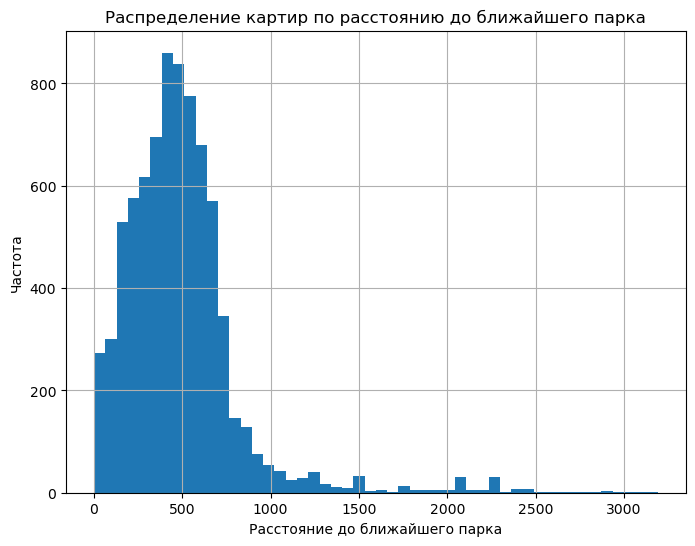

In [108]:
plt.figure(figsize=(8, 6))
df['parks_nearest'].plot(kind='hist', bins=50, grid=True)
plt.title('Распределение картир по расстоянию до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Частота')
plt.show()

Мы можем наблюдать большую часть квартир расположенных от ближайшего парка на расстоянии от 288 метров до 613 метров. Дальше наблюдаем спад - это говорит о том, что есть небольшая часть квартир расположенных ближе или дальше от парка (самая близкая квартира располагается к парку на расстоянии 1 метр, а самая дальняя на расстоиянии +-3 километра)

##### день и месяц публикации объявления:

In [109]:
df['day_week'].describe()

count    23177.000000
mean         2.567589
std          1.788362
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_week, dtype: float64

In [110]:
df['month'].describe()

count    23177.00000
mean         6.40113
std          3.49069
min          1.00000
25%          3.00000
50%          6.00000
75%         10.00000
max         12.00000
Name: month, dtype: float64

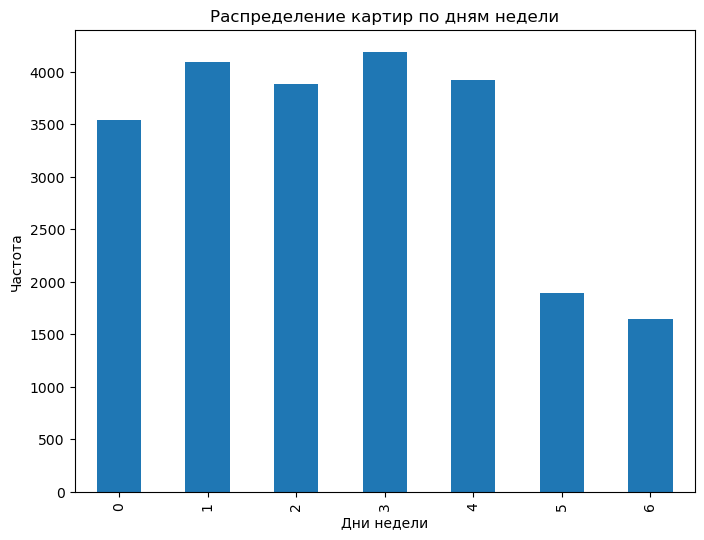

In [111]:
plt.figure(figsize=(8, 6))
df.groupby('day_week')['day_week'].count().plot(kind='bar')
plt.title('Распределение картир по дням недели')
plt.xlabel('Дни недели')
plt.ylabel('Частота')
plt.show()

Мы можем наблюдать большую часть квартир составляют квартиры опубликованные в будние дни - с понедельника(0) по пятницу(4). В остальных случаях наблюдаем спад - это говорит о том что есть небольшая часть квартир опубликованных в выходные - субботу(5) и воскресенье(6).

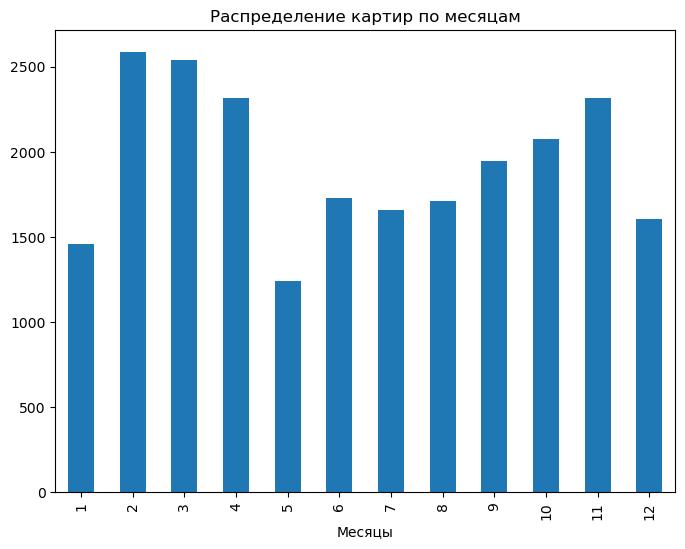

In [112]:
plt.figure(figsize=(8, 6))
df.groupby('month')['month'].count().plot(kind='bar', title='Распределение картир по месяцам')
plt.xlabel('Месяцы') 
plt.show()

Мы можем наблюдать большую часть квартир опубликованных после зимних праздников с февраля(2) по апрель(4), потом идет спад в мае(5) видимо люди заняты майскими праздниками. Дальше идет рост с лета по осень. А в декабре снова спад.

#### Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление:
    - Построим гистограмму.
    - Посчитаем среднее и медиану.
    - Узнаем сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

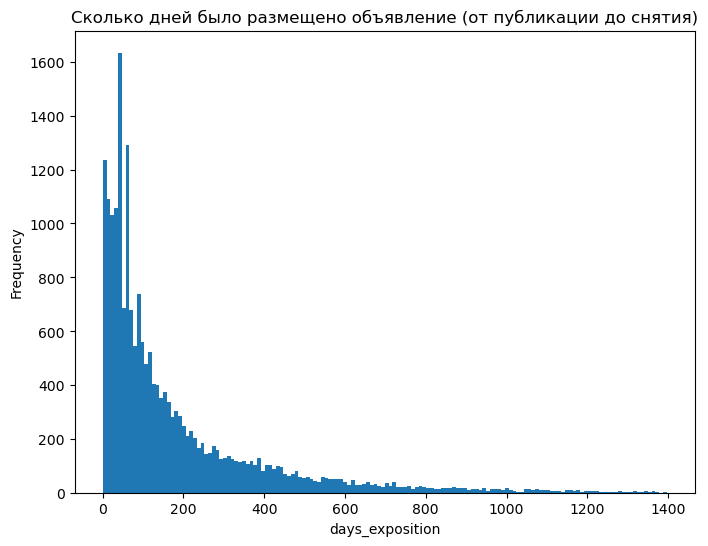

In [113]:
plt.figure(figsize=(8, 6))
df['days_exposition'].plot(kind='hist', title='Сколько дней было размещено объявление (от публикации до снятия)', bins=150)
plt.xlabel('days_exposition')
plt.show()

In [114]:
df['days_exposition'].describe()

count    20079.000000
mean       178.640221
std        215.454313
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1396.000000
Name: days_exposition, dtype: float64

Можем наблюдать, что медианное значение days_exposition(количество дней продажи квартиры) составляет 95, а среднее равняется 178 дням. Данный факт нам сообщает о том, что у нас имеются очень большие значения (длинные хвосты) в нашей выборке. Мы видим, что продажи обычно занимают от 45 до 229 дней от сюда следует, что если квартира продана до 45ти дней, то данный факт говорит о быстрой продаже. Если же квартира продана после 229 дней со дня публикации, то это нам говорит о долгой продаже.

#### Выясним какие факторы больше всего влияют на общую (полную) стоимость объекта. Построим графики, которые покажут зависимость цены от указанных ниже параметров:
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);

##### Общая площадь:

Корреляция цены и общей площади:

In [115]:
df['last_price'].corr(df['total_area'])


0.7458042806538635

Зависимость цены от общей площади:

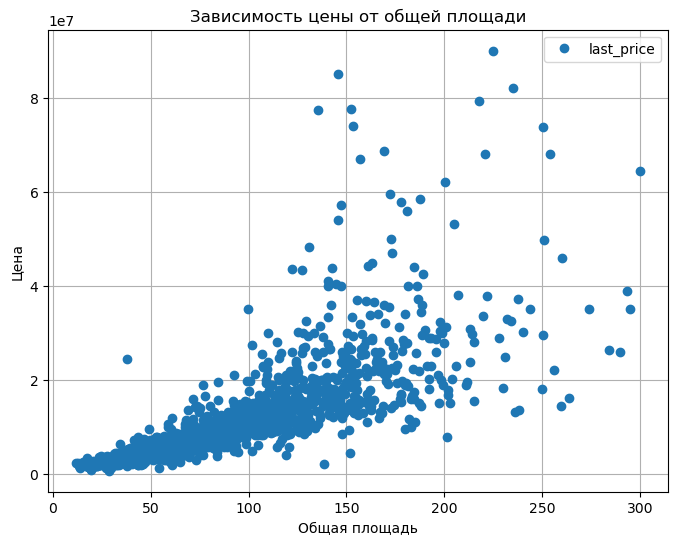

In [116]:
(
    df.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(8, 6))
)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()

Чем больше общая площадь, тем выше стоимость квартиры. Корреляция этих параметров крайне высокая.

##### Жилая площадь:

Корреляция цены и жилой площади:

In [117]:
df['last_price'].corr(df['living_area'])

0.6203894780832427

Зависимость цены от жилой площади:

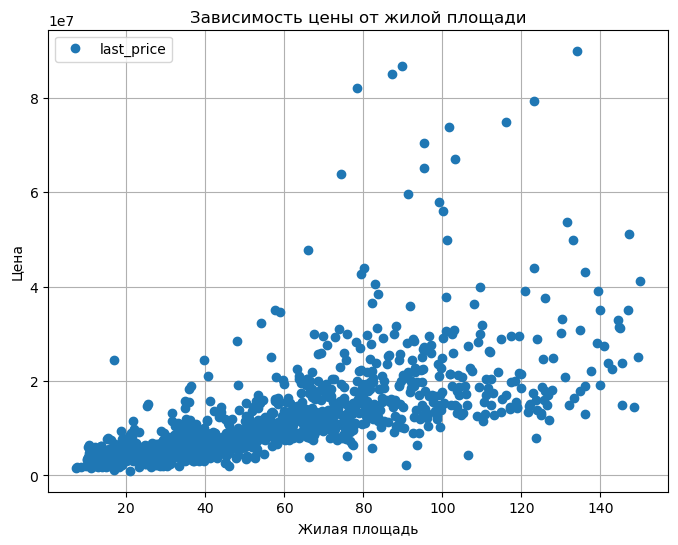

In [118]:
(
    df.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(8, 6))
)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()

Чем больше жилая площадь, тем выше стоимость квартиры. Корреляция этих параметров достаточно высока.

##### Площадь кухни:

Корреляция цены и площади кухни:

In [119]:
df['last_price'].corr(df['kitchen_area'])

0.5357276461753984

Зависимость цены от площади кухни:

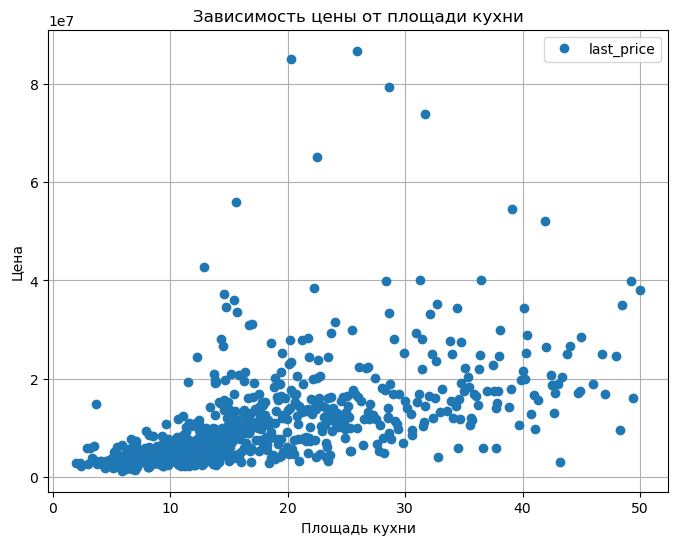

In [120]:
(
    df.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(8, 6))
)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.show()

Чем больше площадь кухни, тем выше стоимость квартиры. Корреляция этих параметров достаточно высока.

##### Количество комнат:

Корреляция цены и числа комнат:

In [121]:
df['last_price'].corr(df['rooms'])

0.45110535508795485

Зависимость цены от числа комнат:

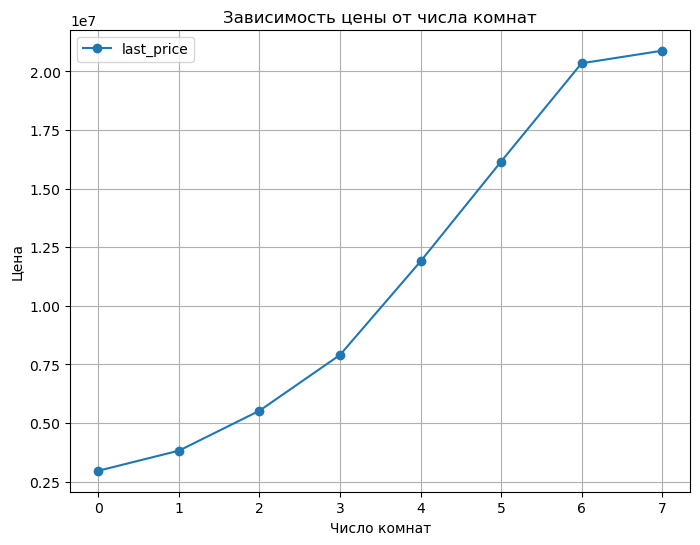

In [122]:
(
    df.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(8, 6))
)
plt.title('Зависимость цены от числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Цена')
plt.show()

Чем больше комнат, тем больше цена за квартиру, следовательно число комнат влияет на цену

##### Тип этажа:

Зависимость цены от типа этажа, на котором расположена квартира (первый, последний, другой):

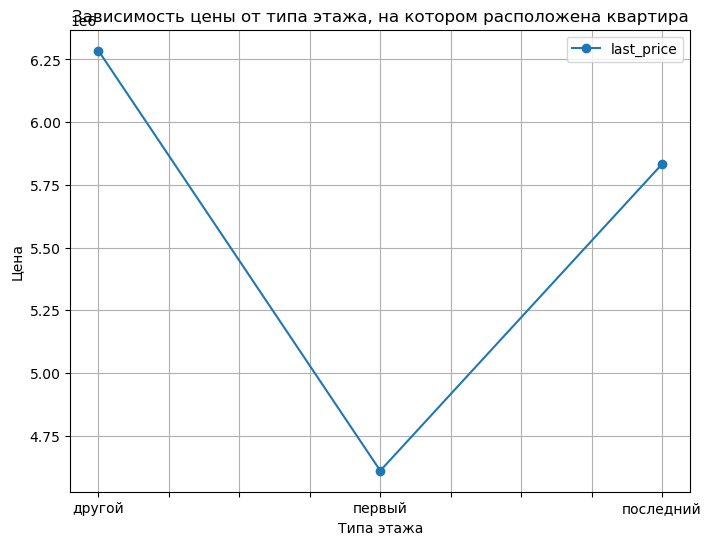

In [123]:
(
    df.pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, style='o-', figsize=(8, 6))
)
plt.title('Зависимость цены от типа этажа, на котором расположена квартира')
plt.xlabel('Типа этажа')
plt.ylabel('Цена')
plt.show()


Благодаря графику можем заметить, что тип этажа влияет на цену квартиры. Самые дешевые варианты будут те, где квартира расположена на первом этаже. Дороже будут квартиры расположенные на последнем этаже здания. А еще более высокой ценной будут обладать квартиры расположенные между первым и последним этажем здания.

##### Даты размещения:

Зависимость цены от даты размещения (день недели, месяц, год):

Зависимость от дня размещения:

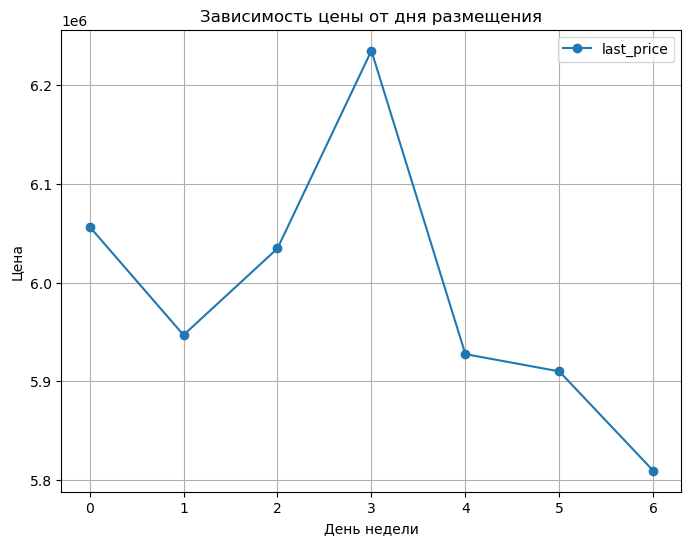

In [124]:
(
    df.pivot_table(index='day_week', values='last_price')
    .plot(grid=True, style='o-', figsize=(8, 6))
)
plt.title('Зависимость цены от дня размещения')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.show()

Благодаря данному графику мы сразу понимаем, что самые дорогие квартиры опубликованы в четверг(3), а самые дешевые в воскресенье(6)

Зависимость от месяца размещения:

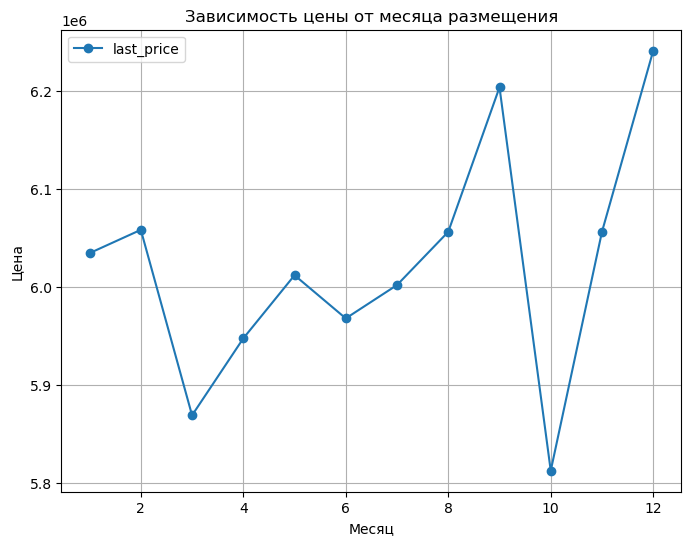

In [125]:
(
    df.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', figsize=(8, 6))
)
plt.title('Зависимость цены от месяца размещения')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

На графике мы видим, что самые дешевые квартиры опубликованы в октябре(10 месяц), а самые дорогие опубликованы в декабре(12 месяц)

Зависимость от года размещения:

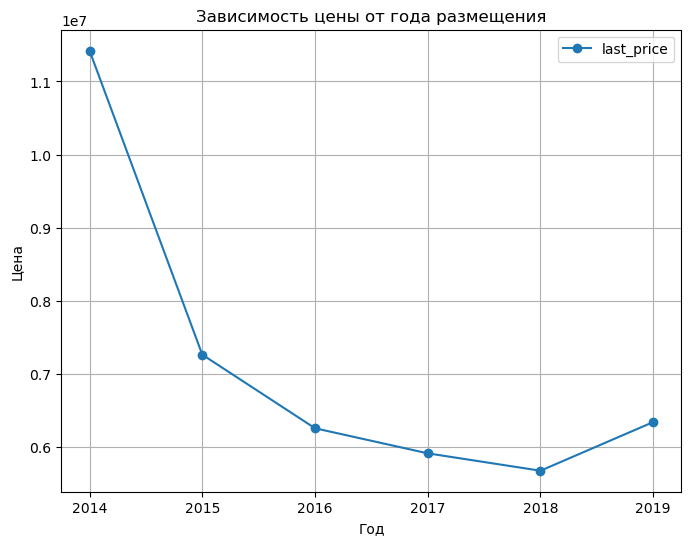

In [126]:
(
    df.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(8, 6))
)
plt.title('Зависимость цены от года размещения')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

На графике мы можем заметить, что самые дорогие квартиры публиковались в 2014 году, потом пошел спад аж до 2018 года, который является по ценам квартир самый дешевый, потом пошел рост до 2019.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Создадим табличку locality_top в которой будут хранятся наименование населенных пунктов, количество объявлений, средняя цена одного квадратного метра и отсортируем ее с убыванием по количеству:

In [127]:
locality_top = df.pivot_table(index='locality_name', values='price_1m',aggfunc=['count','mean']).sort_values(('count','price_1m'), ascending=False)
locality_top.head(10)

,count,mean
,price_1m,price_1m
locality_name,,
санкт-петербург,15329,112988.573227
поселок мурино,551,85601.119782
поселок шушары,438,78577.029680
всеволожск,395,68686.663291
пушкин,358,102857.519553
колпино,336,75352.467262
поселок парголово,325,90132.486154
гатчина,307,68746.110749


Построим круговую диаграмму:

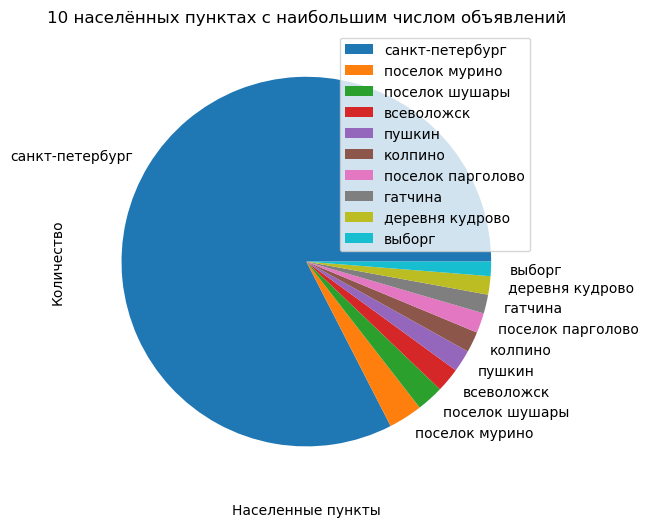

In [128]:
(
    locality_top.head(10)
    .plot(y='count', kind='pie', figsize=(8, 6))
)
plt.title('10 населённых пунктах с наибольшим числом объявлений')
plt.xlabel('Населенные пункты')
plt.ylabel('Количество')
plt.show()

Отобразим среднюю цену за 1 квадратный метр на графике:

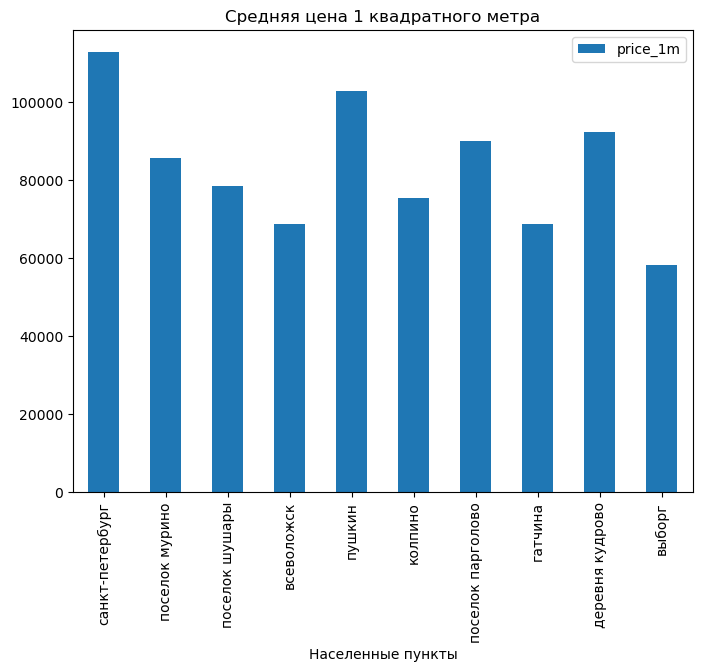

In [129]:
(
    locality_top['mean'].head(10)
    .plot(kind='bar', figsize=(8, 6))
)
plt.title('Средняя цена 1 квадратного метра')
plt.xlabel('Населенные пункты')
plt.show()

Благодаря нашей табличке/диаграмме/графику. Мы знаем топ 10 населенных пунктов по количеству публикаций:
* санкт-петербург;
* поселок мурино;
* поселок шушары;
* всеволожск;
* пушкин;
* колпино;
* поселок парголово;
* гатчина;
* деревня кудрово;
* выборг;

Вывод:
- Из всех выше перечисленных самой высокой ценной за 1 м² обладает санкт-петербург (стоимость 1 м² = 112988)
- А самой низкой стоимостью 1 м² обладает выборг (1 м² = 58190)

#### Вычислим среднюю цену каждого километра. Узнаем, как стоимость объектов зависит от расстояния до центра города.

Для данного анализа из df возьмем только данные по санкт-петербургу:

In [130]:
df_spb = df.query('locality_name == "санкт-петербург"')
df_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m,day_week,month,year,floor_type,distance_city_center
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,16
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.3,4,False,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786,3,8,2015,другой,14
3,0,64900000,159.00,2015-07-24,3,2.60,14,45.0,9,False,False,False,9.50,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,7
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,8
7,5,7915000,71.60,2019-04-18,2,2.75,24,30.5,22,False,False,False,18.90,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110545,3,4,2019,другой,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.3,4,False,False,False,9.10,2,санкт-петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,100567,2,2,2018,другой,16
23690,3,5500000,52.00,2018-07-19,2,2.60,5,31.0,2,False,False,False,6.00,0,санкт-петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,105769,3,7,2018,другой,6
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.60,1,санкт-петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,129904,3,10,2016,другой,4
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72491,1,3,2017,другой,4


Посчитаем среднюю цену км до центра города:

In [131]:
df_spb.groupby('distance_city_center')['price_1m'].mean()

distance_city_center
0     217258.500000
1     149106.111111
2     146500.151408
3     120393.218563
4     128263.286145
5     136480.813225
6     144310.960345
7     152796.630807
8     123861.936317
9     113394.801709
10    112814.416901
11    108308.040517
12    107483.408548
13    108039.148611
14    104128.072612
15    104269.736264
16    100452.909452
17     96940.495954
18     96445.505792
19     98718.683871
20     87214.842105
21     94469.564103
22     91330.405941
23     90362.506173
24     85736.884615
25     91531.346154
26     87798.860465
27    132115.500000
28     81161.857143
29     72953.500000
Name: price_1m, dtype: float64

Взглянем на график зависимости цены от расстояния до центра города:

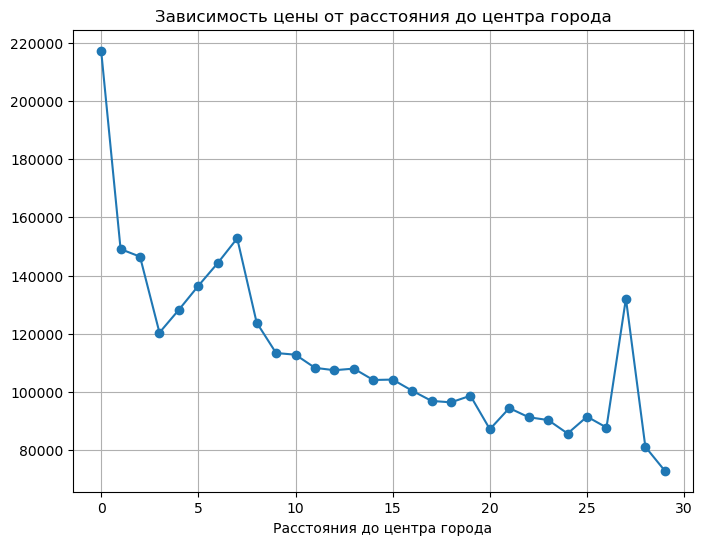

In [132]:
(
    df_spb.groupby('distance_city_center')['price_1m'].mean()
    .plot(figsize=(8, 6), style='o-', grid=True)
)
plt.title('Зависимость цены от расстояния до центра города')
plt.xlabel('Расстояния до центра города')
plt.show()


Можем сделать вывод, что самые дорогие квартиры расположены ближе к центру города

### Общий вывод

#### Как быстро продавлись квартиры:

* Чаше всего квартиру продают за 95 дней;
* В среднем продают квартиру за 178 дней;
* Быстрой продажей квартиры является продажа до 45-ти дней;
* Долгой продажей квартиры является продажа после 229-ти дней;

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта:

1. Больше всего влияет на общую(полную) стоимость объекта это площадь квартиры;
2. Дешевыми вариантами будут квартиры расположенные на первых этажах здания;
3. Если рассматривать даты размещения квартир:
    * Дни недели:
        - дорогие в четверг;
        - дешевые в воскресенье;
    * Месяцы:
        - дорогие в декабре;
        - дешевые в октябре;
    * Годы:
        - дорогие в 2014 году;
        - дешевые в 2018 году;

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

10 населённых пунктах с наибольшим числом объявлений:
* санкт-петербург;
* поселок мурино;
* поселок шушары;
* всеволожск;
* пушкин;
* колпино;
* поселок парголово;
* гатчина;
* деревня кудрово;
* выборг;

Мы выяснили, что:
- Из всех выше перечисленных самой высокой ценной за 1 м² обладает санкт-петербург (стоимость 1 м² = 112988)
- А самой низкой стоимостью 1 м² обладает выборг (1 м² = 58190)

#### Как стоимость объектов зависит от расстояния до центра города:

Мы вычислили среднюю цену каждого километра до центра города и благодаря этим данным построили график зависимости цены от расстояния. За счет которого увидели связь, что чем ближе расположена квартира к центру города, тем ее цена выше.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод